<a id='top'></a>
# Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">What are the key trends of the movie industry over the year?</a></li>
        <li><a href="#q2">What kind of properties associated with high-profit movies?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will try to highlight trends & correlations observed in TMDB dataset by answering the following questions, 

- What are the key trends of the movie industry over the year?
- What kind of properties associated with high-profit movies?

In [1]:
# import necessary packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configure initial settings for visualization
sns.set()

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Load / inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Identifying properties associated with different columns (min, max, percental distribution) before cleaning.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


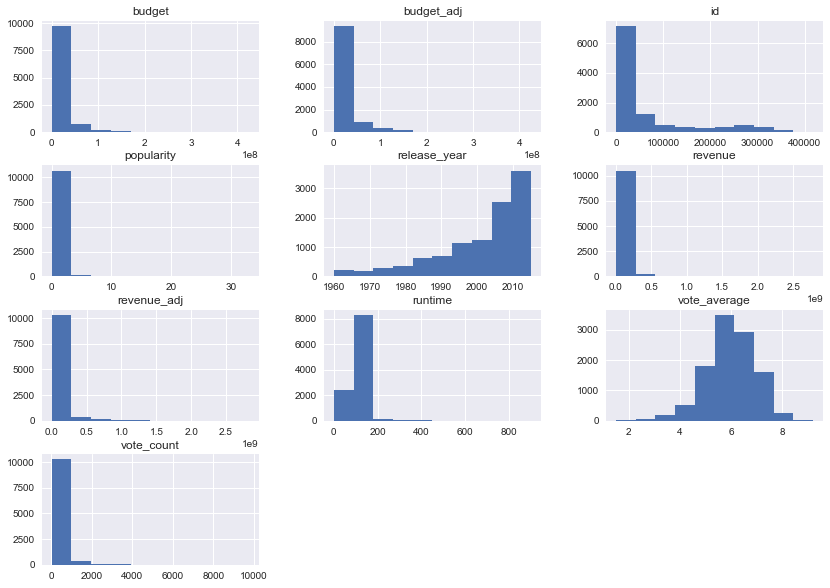

In [6]:
#visualize different columns in the data frame using histagrams.
df.hist(figsize=(14,10));

There are a significant count of movies with `revenue`, `revenue_adj`, `budget`, and `budget_adj` == zero.

In [7]:
# Countifying amount of entries with zero value in `budget_adj` or `revenue_adj`
(df['budget_adj']==0).sum(), (df['revenue_adj']==0).sum()

(5696, 6016)

There are a significant count of movies with `runtime` == zero.

In [8]:
# Countifying amount of entries with zero value in `runtime`
(df['runtime']==0).sum()

31

Based on initial data exploration, the following actions to be taken on different columns

- __Columns to be dropped for irrelevance to investigation objectives__ 
    - `id`, `cast`, `homepage`, `keywords`, `director`, `tagline`, `overview`, `production_companies`


- __Columns to be dropped for redundancy__
    - `budget`: Already covered under the `budget_adj` column
    - `revenue`: Already covered under the `revenue_adj` column 


- __Columns to be created, manipulated, changed or repurposed__
    - `imdb_id` to be used as an index (will be useful as a unique identifier of different records).
    - `release_date` will be dropped after been used to create a new column `release_month`.
    - `budget_adj` and `revenue_adj` have values equals 0. We will change those to NaN to make sure they won't affect mathematical calculation in later stages.
    > We won't fill `budget_adj` and `revenue_adj` zero items with average because we have a significant amount of entries with (~5k entries) and filling them with average will skew analysis associated with revenue-budget correlation.
    - `runtime` have items == 0 (30 items). We will  fill those with average.
    - Create a new column `profit_adj` = `revenue_adj` - `budget_adj`



### Data Cleaning
#### Dropping redundunt / irrrelevant columns

In [9]:
# dropping irrelevant columns
df.drop(['id','cast','homepage','keywords','director','tagline','overview','production_companies'], axis=1, inplace=True)

# dropping redundunt columns
df.drop(['budget','revenue'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


#### Detect & remove duplicate rows

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

#### Detect & fill/removeNaN values

In [13]:
df.isnull().sum()

imdb_id           10
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**NaN in `imdb_id` column**

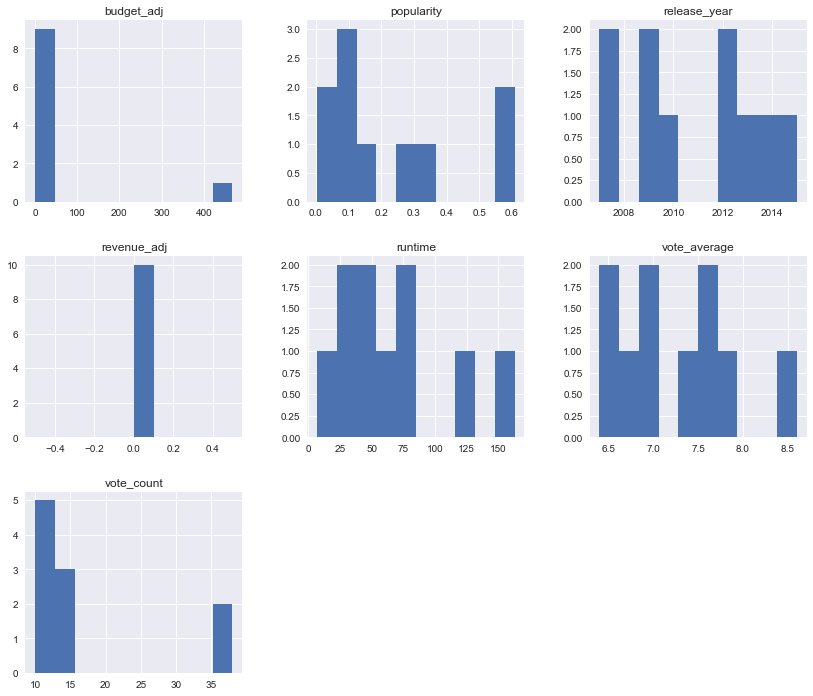

In [14]:
df[df.imdb_id.isnull()].hist(figsize=(14,12));

We found that all items with NaN `imdb_id` have zero value in both `budget_adj` and `revenue_adj`. Besides that, we found no other correlation with other properties in the datasets. Hence, it will be ok if we drop the 10 records of NaN in `imdb_id`.

**NaN in `generes` column**

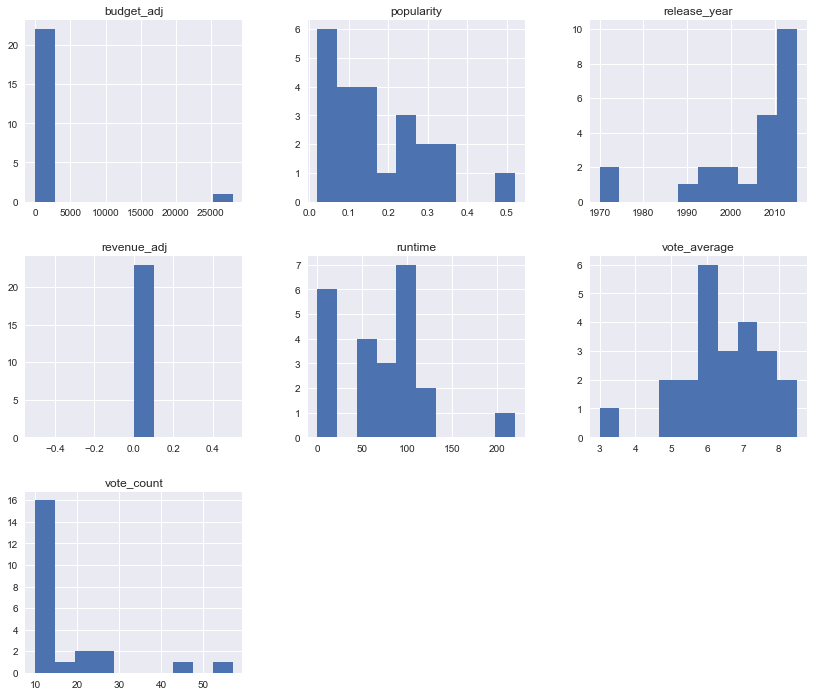

In [15]:
df[df.genres.isnull()].hist(figsize=(14,12));

We found that all items with NaN `genres` have zero value in both `budget_adj` and `revenue_adj`. Besides that, we found no other correlation with other properties in the datasets. Hence, it will be ok if we drop the 23 records of NaN in `genres`.

**Dropping NaN rows**

In [16]:
df.dropna(inplace = True)
df.isnull().sum()

imdb_id           0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Manipulating columns for analysis

Create the `release_month` from `release_year` then drop `release_year`.

In [17]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.drop(['release_date'], axis=1, inplace=True)

Fill into zero items in `budget_adj` and `revenue_adj` with NaN

In [18]:
# Fill into zero items in budget_adj and revenue_adj with NaN
df['budget_adj'] = df['budget_adj'].replace(0,np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0,np.NAN)

Fill into zero items in `runtime` with average

In [19]:
# Fill into zero items in budget_adj and revenue_adj with NaN
df['runtime'] = df['runtime'].replace(0,np.NAN)
df['runtime'].fillna(df.runtime.mean(), inplace = True)

**Create new column profit_adj**

In [20]:
#create new column `profit_adj`
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']



Previous step concludes the data wrangling phase. Below is the general structure and properties of the cleaned data-set.

In [21]:
df.isnull().sum()

imdb_id              0
popularity           0
original_title       0
runtime              0
genres               0
vote_count           0
vote_average         0
release_year         0
budget_adj        5667
revenue_adj       5985
release_month        0
profit_adj        6980
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id           10834 non-null object
popularity        10834 non-null float64
original_title    10834 non-null object
runtime           10834 non-null float64
genres            10834 non-null object
vote_count        10834 non-null int64
vote_average      10834 non-null float64
release_year      10834 non-null int64
budget_adj        5167 non-null float64
revenue_adj       4849 non-null float64
release_month     10834 non-null int64
profit_adj        3854 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1.1+ MB


In [23]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit_adj
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,5.167000e+03,4.849000e+03,10834.000000,3.854000e+03
mean,0.647776,102.446409,217.970833,5.973159,2001.308196,3.690334e+07,1.151009e+08,6.829149,9.282470e+07
std,1.001316,30.798047,576.368151,0.933831,12.815839,4.196281e+07,1.988557e+08,3.439508,1.940715e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,1.000000,-4.139124e+08
25%,0.208387,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07,4.000000,-1.504995e+06
50%,0.384587,99.000000,38.000000,6.000000,2006.000000,2.273036e+07,4.395666e+07,7.000000,2.737064e+07
75%,0.715767,111.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08,10.000000,1.074548e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09


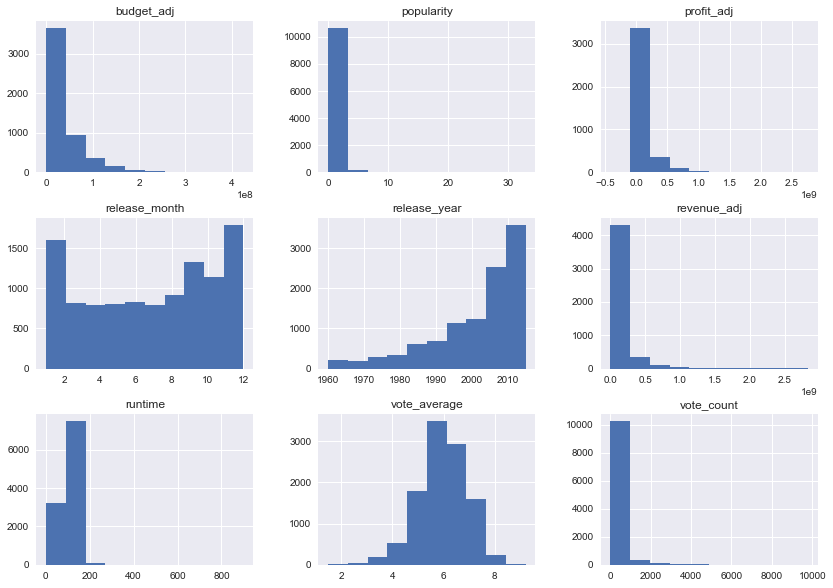

In [24]:
#visualize different columns in the data frame using histagrams.
df.hist(figsize=(14,10));

___

<a id='eda'></a>
## Exploratory Data Analysis 

This investigation will try to address the following questions

- What are the key trends of the movie industry over the year?
- What kind of properties associated with high-profit movies?

<a id='q1'></a>
### What are the key trends of the movie industry over the year?
This investigation will focus on trends associated with **Volume**, **Popularity**, **Run Time** and **Release time**.

Analyzing the movies release volume over release year & release month.

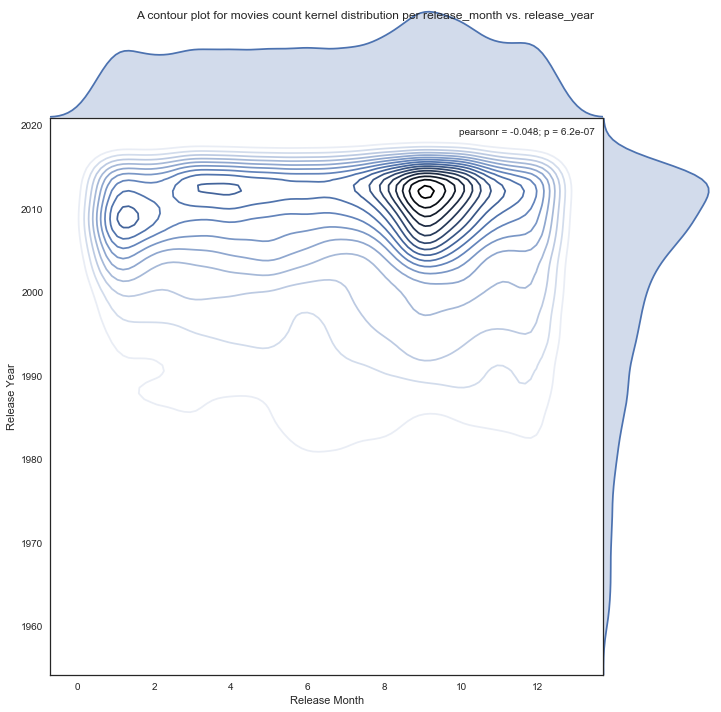

In [25]:
# Create a contour plot for release_month vs. release_year
with sns.axes_style('white'):
    ax = sns.jointplot("release_month", "release_year", df, kind='kde', 
                      size=10, space=0, shade=False, n_levels=20);
    ax.ax_joint.set_xlabel('Release Month')
    ax.ax_joint.set_ylabel('Release Year')
    ax.ax_joint.set_label('Helloworld')

    ax.fig.suptitle('A contour plot for movies count kernel distribution per release_month vs. release_year')

> Note: We didn't use `xlim` and `ylim` on above curve to have better visualization, but it has to be clear that the dataset at hand holds data for the period from **1960** to **2015** and tail drop appearing on the graph is just an __interpolation__ by the plotting tool.

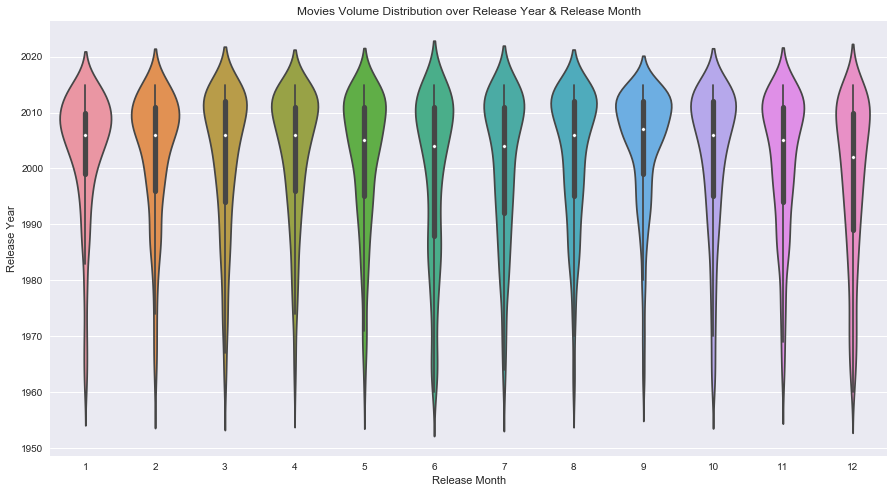

In [26]:
# Create a violin plot for release_month vs. release_year
plt.figure(figsize=(15,8))
ax = sns.violinplot("release_month", "release_year", data=df, );
plt.title('Movies Volume Distribution over Release Year & Release Month')
plt.xlabel('Release Month')
plt.ylabel('Release Year');

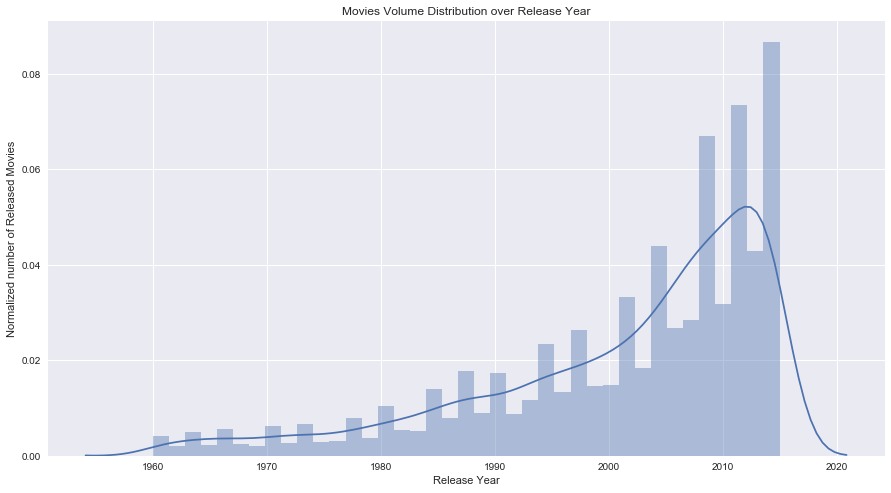

In [27]:
# Create a normalized distribution histogram with KDE assoicated with volume trends over release_years
plt.figure(figsize=(15,8))
sns.distplot(df['release_year'], kde=True, norm_hist=True)
plt.title('Movies Volume Distribution over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Normalized number of Released Movies');

A Couple of observations from the above diagrams, 
- This dataset infers a significant increase in the volume of movies over the years.
- A pattern change has happened to release month around the 80s-years that require further analysis.

Investigating the volume increase over the years.

In [28]:
df['release_year'].describe()

count    10834.000000
mean      2001.308196
std         12.815839
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

Above IQR of `release_year` states that half of movies in this data-set have been released after 2006 (50% point).

Above diagram highlights two observations
- Significant increase in released movies per year in the last 15 years (2000 till 2015).
- Movies tend to be released in bursts every couple of years.

**Investigating the pattern change of release month over years**

Create a categorical column `release_decade` from `release_year` around its x10 increments (ex. 1960s, 1970s, etc.)

In [29]:
# Create release_decade categorical column
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019]
bin_names = ['1960s','1970s','1980s','1990s','2000s','2010s']
df['release_decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df['release_decade'].value_counts()

2010s    3589
2000s    3552
1990s    1763
1980s    1062
1970s     506
1960s     362
Name: release_decade, dtype: int64

Create a countor plot with kernel distribution estimation (kde) graph of movie-count **grouped by decade** vs. `release_year` and `release_month`

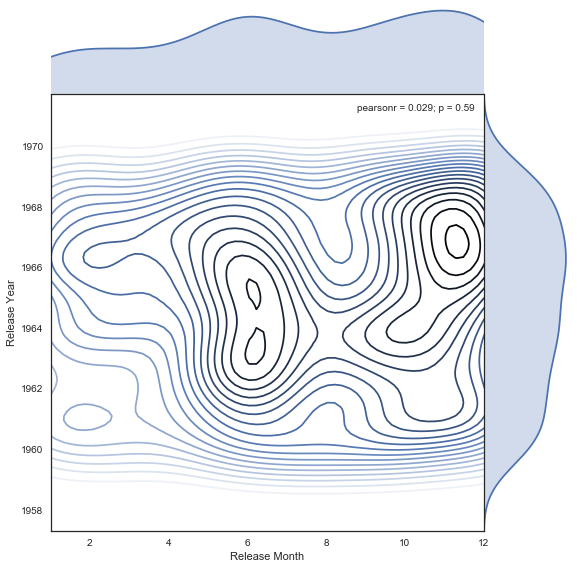

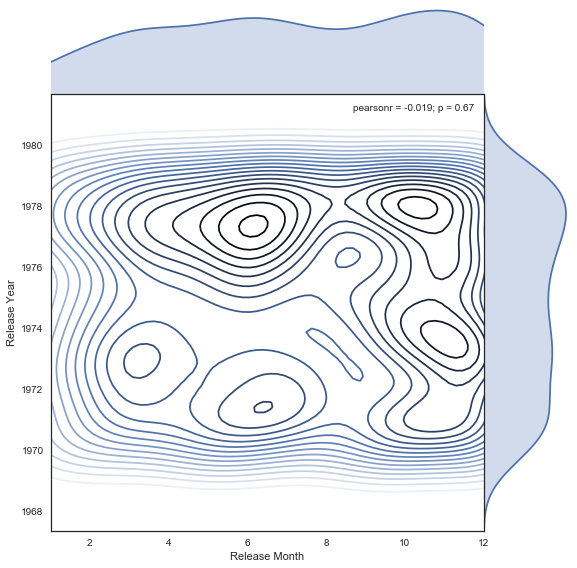

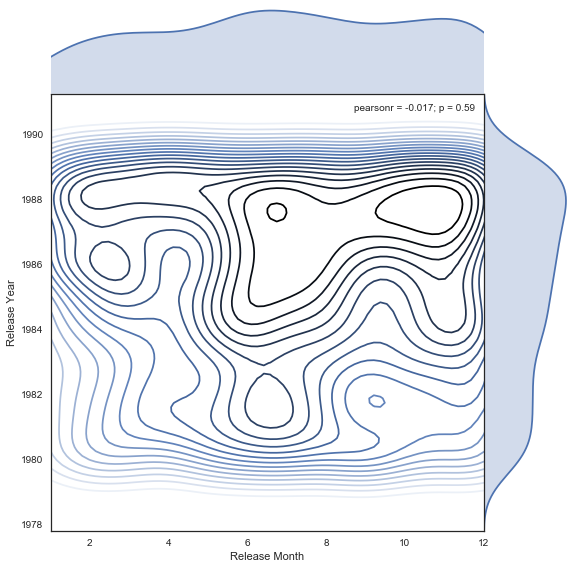

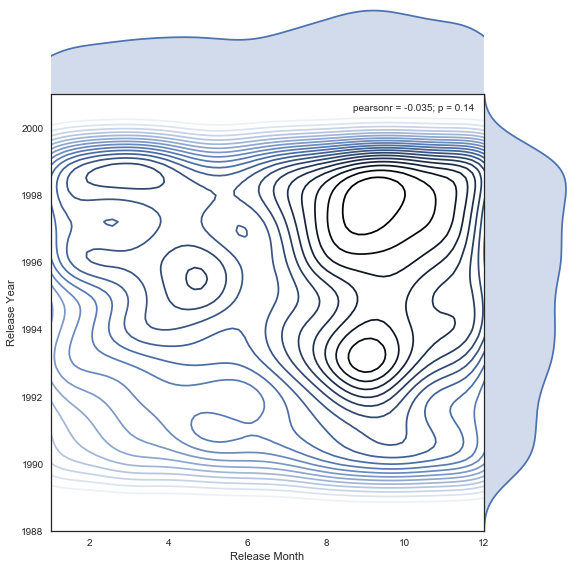

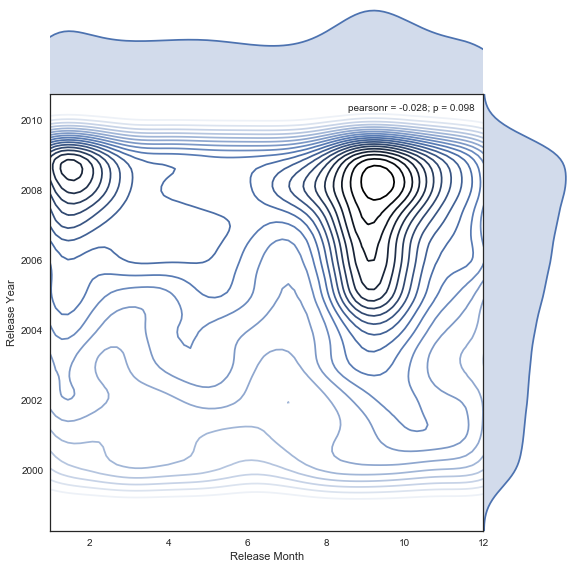

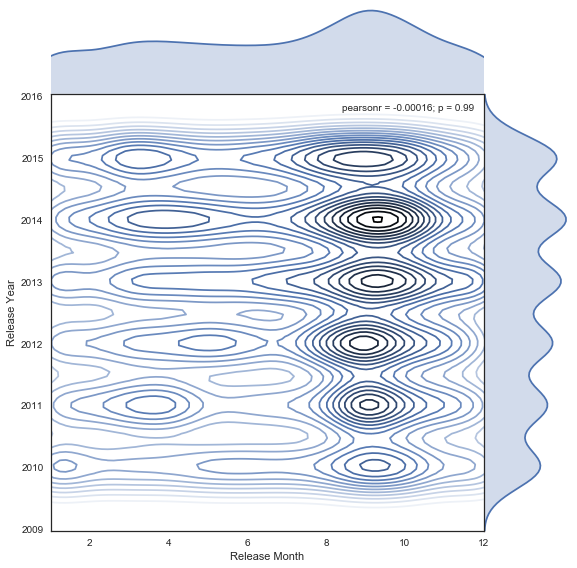

In [30]:
# Create a contour plot for release_month vs. release_decade
for decade in ['1960s','1970s','1980s','1990s','2000s','2010s']:
    query = 'release_decade == "'+decade+'"'
    with sns.axes_style('white'):
        ax = sns.jointplot("release_month", "release_year", df.query(query), kind='kde', 
                      size=8, space=0, shade=False, n_levels=20, xlim={1,12});
        ax.ax_joint.set_xlabel('Release Month')
        ax.ax_joint.set_ylabel('Release Year')

Above diagram highlights a couple of observations

**Release Pattern**

- Release pattern in recent years (2010-2015) has moved to be annual focused with the majority of movies released around summer time. 
- Release pattern in earlier years (2010 and earlier) span across the whole year.
- Peak release time in earlier years (2010 and earlier) has been changing between late Winter, Spring & Summer.

**Release Volume**
- The volume of released movies in the recent years (2010-2015) is significantly higher in the Summer period compared to the past years (2010 and earlier). This conclusion justifies the hilly pattern we see in the last graph).

Below diagram visualizes the last point (_recent years have narrower spread compared to earlier years_) in a more explicit way.

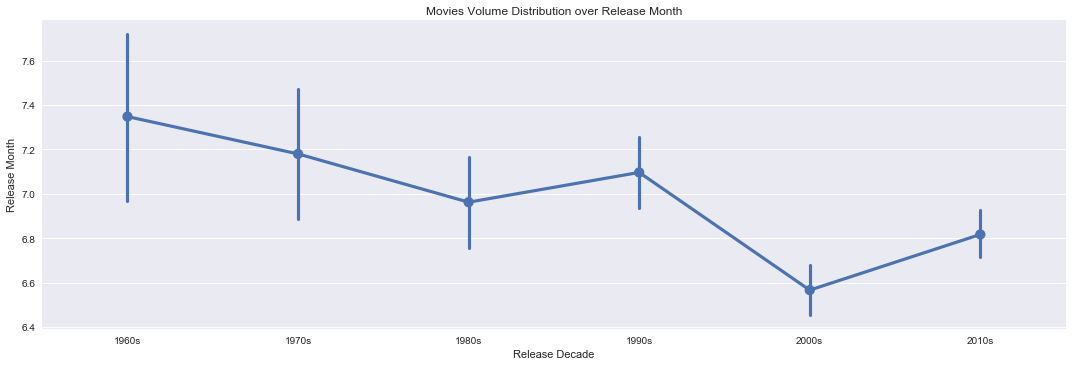

In [31]:
sns.factorplot(x="release_decade", y="release_month", data=df, 
               size=5, aspect=3);
plt.title('Movies Volume Distribution over Release Month')
plt.xlabel('Release Decade')
plt.ylabel('Release Month');

Above diagram highlights a couple of observations
- The peak of movies release has changed from first half of July to last half of June over the years.
- The spread of movies release has become narrower over time.

**Analyzing Popularity vs. Release time (Year/Month)**

In [32]:
df['popularity'].describe()

count    10834.000000
mean         0.647776
std          1.001316
min          0.000065
25%          0.208387
50%          0.384587
75%          0.715767
max         32.985763
Name: popularity, dtype: float64

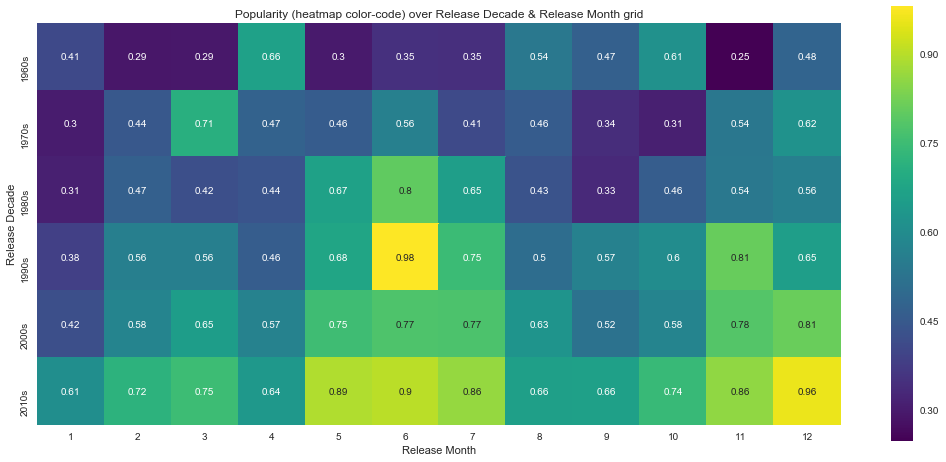

In [33]:
# Generate a pivot table from df breaking popularity over release_decade & release_month
result = df.pivot_table(index='release_decade', columns='release_month', values='popularity')

# Generate a heatmap using the created pivot table
plt.figure(figsize=(18,8))
sns.heatmap(result, annot=True, fmt=".2g", cmap='viridis', square=True);
plt.title('Popularity (heatmap color-code) over Release Decade & Release Month grid')
plt.xlabel('Release Month')
plt.ylabel('Release Decade');

Above heat map infer a couple of observations, 
- Movies popularity (on average) have been increasing over the years. 
- Movies peak popularity tend to be around Spring (April) & Fall (October) during the 60s and 70s. That pattern has changed now to be strictly around summer (May, June, July) and Winter (November/December).

Creating a categorical column `pop_class` around `popularity` interquartile range 'IQR'.

In [34]:
# Create popularity class column
bin_edges = [0.000065,0.208387,0.384587,0.715767,32.985763]
bin_names = ['Low','Medium','High','Very High']
df['pop_class'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)
df['pop_class'].value_counts()

Very High    2709
Low          2709
High         2708
Medium       2708
Name: pop_class, dtype: int64

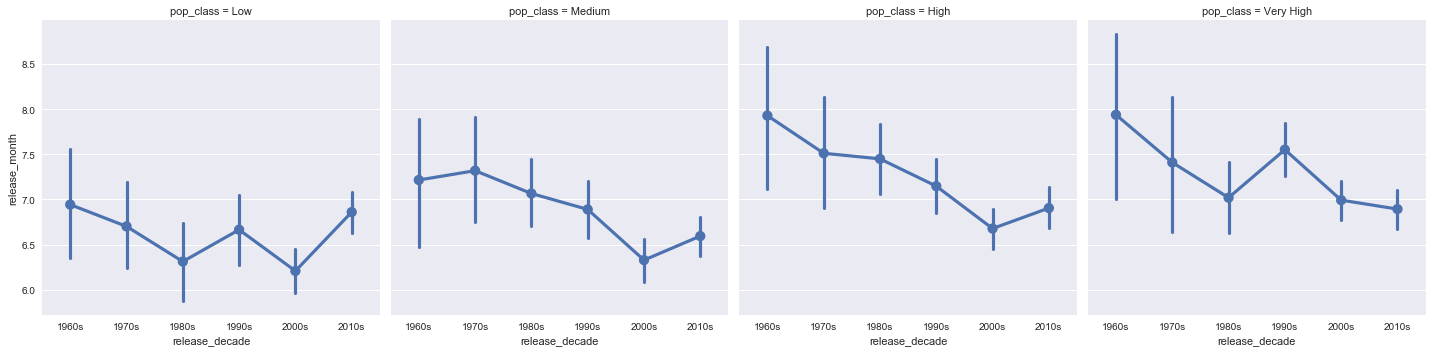

In [35]:
sns.factorplot(x="release_decade", y="release_month", data=df, col="pop_class", 
               size=5, aspect=1);

Above diagram shows that the most popular movies tend to be around a broader spread of months (June, July, August) in the 60s, That patter has changed where the majority of most popular movies are releasing around the second half of June after the year of 2000

**Analyzing Movies Run Time**

How the runtime of movies differ year to year?

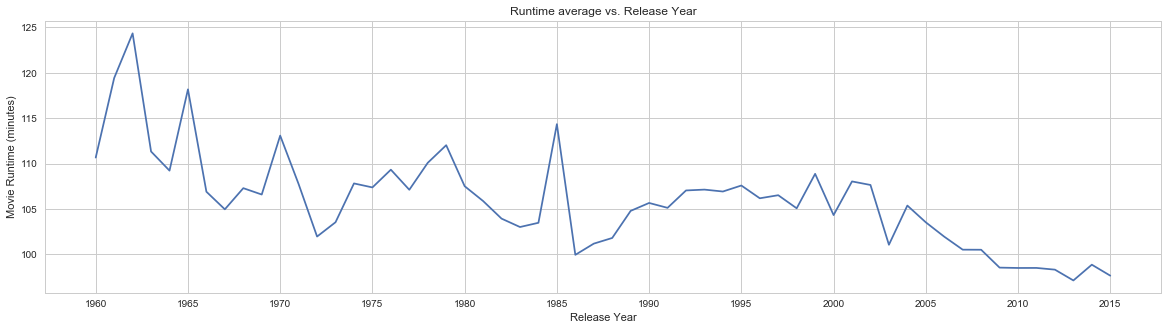

In [36]:
#how the runtime of the movies differ year to year.

plt.figure(figsize=(20,5))

#make the group of the data according to their release_year and find the mean  related to this and plot.
with sns.axes_style('whitegrid'):
    df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5));

#setup the figure properties
plt.title("Runtime average vs. Release Year")
plt.xlabel('Release Year')
plt.ylabel('Movie Runtime (minutes)');

Above diagram highlights the negative trend of **average** movie runtime over the years. 

<a id='q2'></a>
### What kind of properties associated with high-profit movies?
This investigation will identify the spread in **profit** levels then focus on the potential correlation between reaching high-profit level vs. **Budget**, **Release time**, **Popularity**, **Vote Count**, **Vote Average**, and **Runtime**.

Identifying the spread in profit column

In [37]:
df['profit_adj'].describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

Create a profit categorical column `profit_class` breaking the data set into three classes
- **Profitless** - where profit is less than 0
- **Profitable** - where profit is > 0 and less than Q3 (75% point)
- **Highly Profitable** - whhere profit is higher than Q3 (75% point)

In [38]:
# Create profit_class categorical column
bin_edges = [-4.139124e+08, 0,1.074548e+08 , 2.750137e+09]
bin_names = ['Profitless','Profitable','Highly Profitable']
df['profit_class'] = pd.cut(df['profit_adj'], bin_edges, labels=bin_names)
df['profit_class'].value_counts()

Profitable           1814
Profitless           1075
Highly Profitable     964
Name: profit_class, dtype: int64

In [39]:
df['profit_class'].describe()

count           3853
unique             3
top       Profitable
freq            1814
Name: profit_class, dtype: object

Building the correlation matrix across the whole data-set

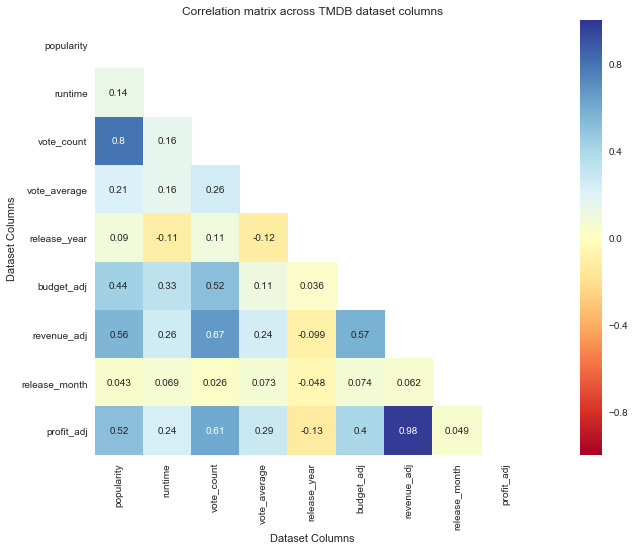

In [40]:
#identify correlation across df & plot them in a heat map
df_corr = df.corr()

# create seaboarn heatmap for df_corr
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")

# generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot heatmap
sns.heatmap(df_corr, annot=True, fmt=".2g", cmap='RdYlBu', mask=mask, square=True, 
            center=0, vmin=-1.0, vmax=1.0);

plt.title('Correlation matrix across TMDB dataset columns')
plt.xlabel('Dataset Columns')
plt.ylabel('Dataset Columns');

Above matrix infers the following correlations between adjusted profit `profit_adj` and 
- `revenue_adj` with positive correlation at `+0.98`
- `vote_count` with positive correlation at `+0.61`
- `popularity` with positive correlation at `+0.52`
- `budget_adj` with positive correlation at `+0.40`
- `vote_average` with positive correlation at `+0.29`
- `runtime` with positive correlation at `+0.24`
- `release_year` with **negative** correlation at `-0.13`

The above matrix also inferes a significant positive correlation between `vote_count` & `popularity`

Identifying correlation across dataframe for different profit classes `profit_class`

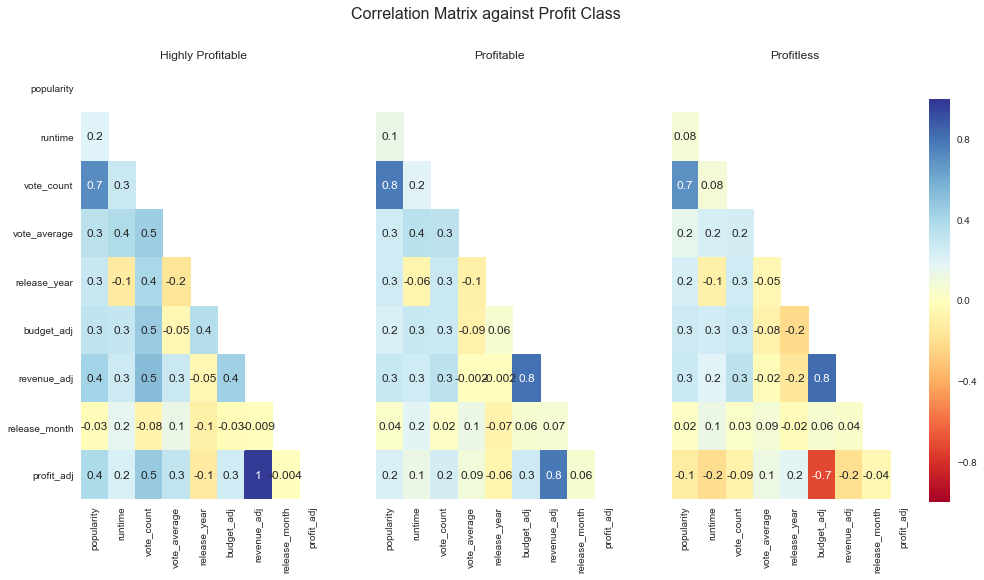

In [46]:
# setup the plot properties
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3,sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .12, .02, .7])

fig.suptitle('Correlation Matrix against Profit Class',fontsize = 16)

df_corr_class = {}
i = 0

for profit_level in df['profit_class'].unique():
    if profit_level != profit_level: #check if profit_level is NaN
        pass
    else: 
        df_corr_class[profit_level] = df.query('profit_class =="'+profit_level+'"').corr()
        
        # generate a mask for the upper triangle
        mask = np.zeros_like(df_corr_class[profit_level], dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        # plot heatmap
        sns.heatmap(df_corr_class[profit_level], annot=True, fmt=".1g", cmap='RdYlBu', mask=mask, 
                    center=0, vmin=-1.0, vmax=1.0, 
                    ax = ax[i], cbar=i == 0, cbar_ax=None if i else cbar_ax);
        ax[i].set_title(profit_level)
        
        i+=1
        

Above plot do NOT infer any significant discrepancy between **Highly Profitable** & **Profitable** classes from correlation with other parameters prespective.

Plotting the correlation between `profit_adj` and other dataset columns.

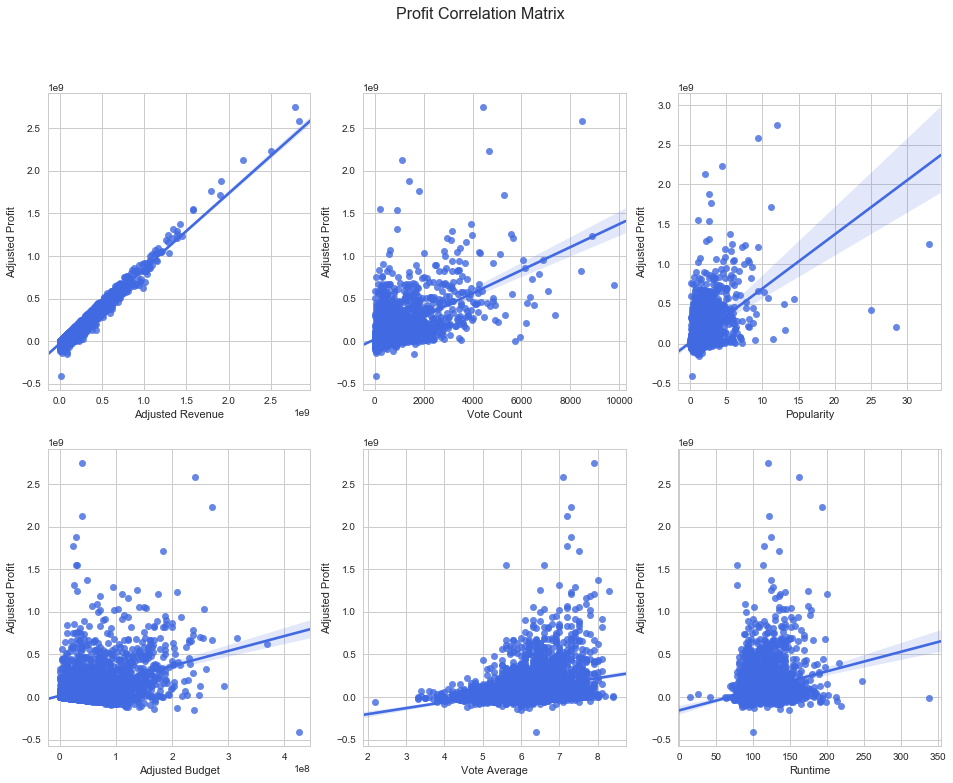

In [42]:
# setup the plot properties
sns.set_style("whitegrid")
ax_rows, ax_columns = 2,3
fig, ax = plt.subplots(ax_rows,ax_columns,figsize = (16,12))
fig.suptitle('Profit Correlation Matrix',fontsize = 16)

variables = [df['revenue_adj'],df['vote_count'],df['popularity'],df['budget_adj'],df['vote_average'],df['runtime']]
variables_titles =['Adjusted Revenue','Vote Count','Popularity','Adjusted Budget','Vote Average','Runtime']

for i in range(len(variables)):
    #setup subplot location
    ax_row = i//ax_columns
    ax_column = i%ax_columns
    
    #plot subplot with assoicated parameters
    sns.regplot(y=df['profit_adj'], x=variables[i], color='royalblue', ax=ax[ax_row][ax_column])
    ax[ax_row][ax_column].set_xlabel(variables_titles[i])
    ax[ax_row][ax_column].set_ylabel("Adjusted Profit");

Plotting the correlation between adjusted profit & release year

Adjust Profie vs. Release Year Correlation: -0.1322


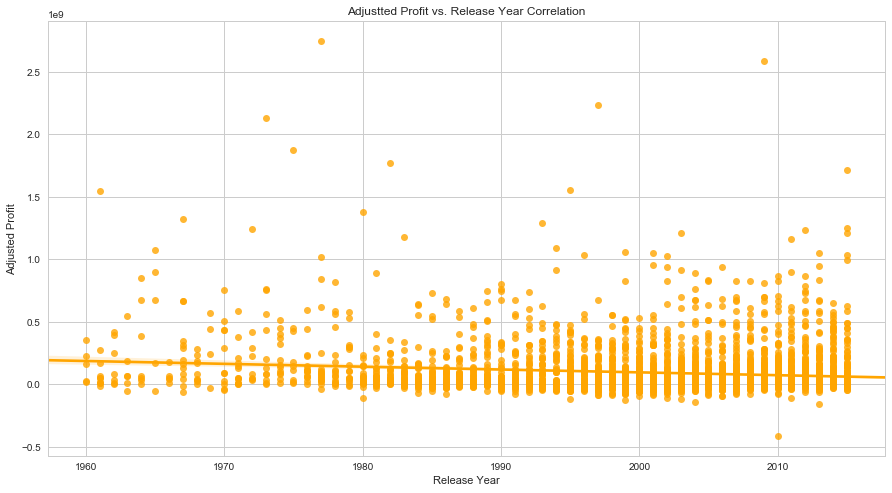

In [47]:
# create a regression plot fpr revenue_adj & budget_adj
plt.figure()
ax = sns.regplot(x=df['release_year'], y=df['profit_adj'], color='orange')

# set graph properties
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
ax.set_title("Adjustted Profit vs. Release Year Correlation")
ax.set_xlabel("Release Year")
ax.set_ylabel("Adjusted Profit")

print("Adjust Profie vs. Release Year Correlation: {:+.4f}".format(df_corr.loc['profit_adj','release_year']));

Plotting correlation between Profit & other parameters **per `profit_class`**.

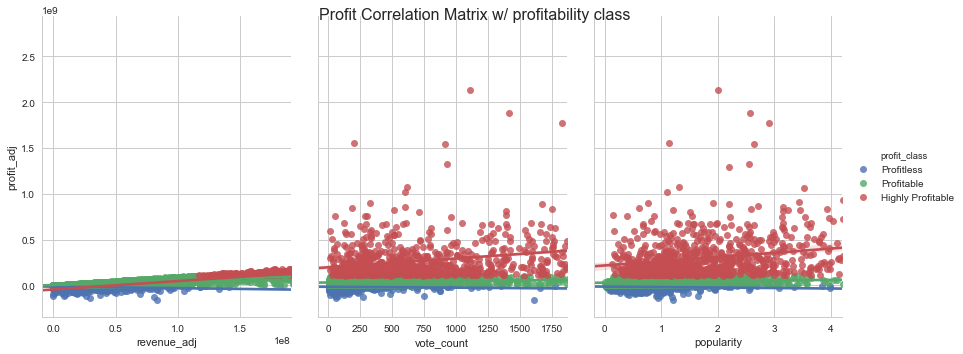

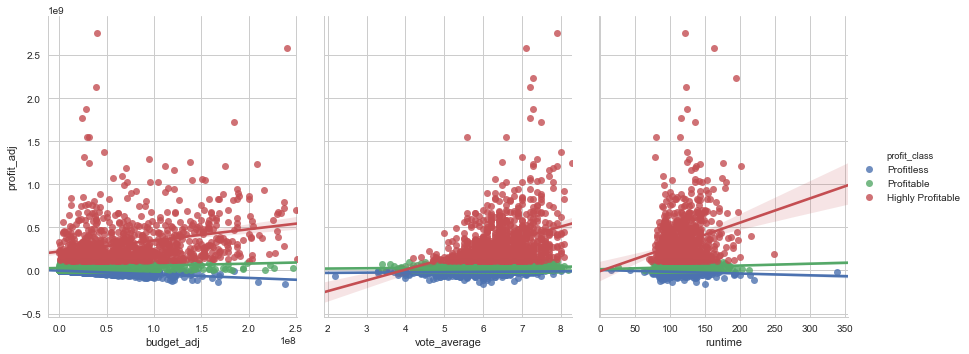

In [44]:
# setup the plot properties
sns.set_style("whitegrid")

variables = ['revenue_adj','vote_count','popularity','budget_adj','vote_average','runtime']
variables_titles =['Adjusted Revenue','Vote Count','Popularity','Adjusted Budget','Vote Average','Runtime']

#plot subplot with assoicated parameters
g = sns.pairplot(data=df, y_vars=['profit_adj'], x_vars=variables[:3], kind='reg', hue='profit_class',
            size=5, aspect=.8,);
sns.pairplot(data=df, y_vars=['profit_adj'], x_vars=variables[3:], kind='reg', hue='profit_class',
             size=5, aspect=.8,);

g.fig.suptitle('Profit Correlation Matrix w/ profitability class',fontsize = 16);

<a id='conclusions'></a>
## Conclusions

### Investigations

**Trends & patterns explored:**
- The trend of release volume over the years.
- The release pattern within the year.
- The trend of runtime over the years.

**Corelations evaluated:**

- Popularity vs. Release Time.
- Release-month vs. Revenue & Popularity.
- Profit vs. other properties in the dataset.



### Findings
- Movies production has been increased in volume significantly in the last 15 years (2000 till 2015)
- Movies tend to be released in bursts every couple of years except during the 2010s where analysis shows a focused release during summer every year.
    - Release pattern in recent years (2010-2015) has moved to be annual focused with the majority of movies released around summer time.
    - Release pattern in previous years (2010 and earlier) span across the whole year.
    - Peak release time in earlier years (2010 and earlier) has been changing between late Winter, Spring & Summer.
- Movies peak popularity tend to be around Spring (April) & Fall (October) during the 60s and 70s. That pattern has changed now to be strictly around summer (May, June, July) and Winter (November/December).
- Runtime trend to go lower over the years.
- Analysis infers the following correlations for **Adjusted Profit** 
    - **Positive** correlation with **Adjusted Revenue**, **Vote Count**, **Popularity**, **Adjusted Budget**, **Vote Average**, and **Runtime**. 
    - **Negative**  correlation with **Release Year**
    - Above analysis has been consistant for both Profitable & Highly Profitable classes.


### Limitations
- Conclusions in this report have assumed that the provided dataset is a comprehensive set of all movies released between 1960 and 2015.


## Submition Routine

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255